## Importing required packages

In [1]:
# Immport zpt function. Make sure you have both the zpt.py and this notebook (zpt.ipynb) in the same folder.
from tools import zpt

# Importing a few built-in python and astropy packages
import os
import pandas as pd
from ccdproc import ImageFileCollection
from astropy.table import Table

%matplotlib notebook

## 1 Getting Image File Collection and Filtering Data

Before estimating the zero points, we want to get an image colletion of the images stored in our working folder. In the next cell, we will define our working folder. One can put the path to it explicitly or if you prefer, you can move this notebook to your working folder and define the `working_folder` as `working_folder = os.getcwd()`. 

In the cells below, we defined the working folder based on the same directory structure you will find in the 
[LDSS3 GitLab Repository](http://gitlab.lco.cl/dsanmartim/ldss). In order to do that, we used this command: `working_folder = os.path.join(cwd, "sample")`. Note that the `data` folder contains a `sample` folder, with a data set sample of LDSS imaging observations and also the `sdss_faint.fits` table with the standard stars we usually observe with LDSS3. 

```
├── data
│   ├── sample
│   │   ├── ccd*.fits
│   └── sdss_faint.fits
├── tools
├── docs
├── zpt.ipynb
```

If you downloaded the entire repository from gitlab, then we recommend you run this notebook with the sample data set before running it in your data. Below, we are eaxecuting all steps in the sample data set located inside the `data/sample` folder.

In [2]:
##### Option 1
# Uncomment and insert the path to your working folder
# working_folder = '/path-to-working-folder/'

##### Option 2
# Comment if you don't want to use this definition
working_folder = os.path.join(os.getcwd(), 'data/sample')

In [3]:
# You don't need to edit this cell, unleass you are familiar with jupyter notebooks and want to change somethink
keywords = ['object', 'aperture', 'filter', 'grism', 'exptime', 'exptype', 'ra', 'dec', 'ra-d', 'dec-d', 
            'airmass']

# Note that you can include or exclude keywords (same as the ones in the header images) if you want. Just follow 
# the same syntax
ic = ImageFileCollection(working_folder, glob_include='ccd*c1.fits', keywords=keywords, ext=0)

# Gonig to data dir
os.chdir(working_folder)

# Displaying the current path location
os.getcwd()

'/Users/dsanmartim/PycharmProjects/ldss/data/sample'

###  Filtering data

Here we will keep in the Image Collection only the files we want to analyze. For example, if we have `bias` and `flat` files in our working folder and we don't want to see them in our Image Collection, just run the cell below.

Let's say we want to exclude from our Image Collection files files which the `object` name is '*target name*'. In this case, we just do the following to exclude such files from the Image Collection data frame:

```python
df = df[df.object != 'target name']
```

In [4]:
# Converting Image Collection to Pandas Data Frame
df = ic.summary.to_pandas()

# Removing bias and flat from data frame
df = df[df.exptype != 'Bias']
df = df[df.exptype != 'Flat']

df

,file,object,aperture,filter,grism,exptime,exptype,ra,dec,ra-d,dec-d,airmass
17,ccd1077c1.fits,92_282 def=150,Open,z_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.1,14.175042,0.644472,1.153
18,ccd1078c1.fits,92_282 def=150,Open,z_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.1,14.175042,0.644472,1.152
19,ccd1079c1.fits,92_282 def=150,Open,z_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.1,14.175042,0.644472,1.152
20,ccd1080c1.fits,92_282 def=150,Open,i_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.1,14.175042,0.644472,1.151
21,ccd1081c1.fits,92_282 def=150,Open,i_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.1,14.175042,0.644472,1.151
22,ccd1082c1.fits,92_282 def=150,Open,i_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.0,14.175042,0.644444,1.151
23,ccd1083c1.fits,92_282 def=150,Open,r_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.0,14.175042,0.644444,1.151
24,ccd1084c1.fits,92_282 def=150,Open,r_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.0,14.175042,0.644444,1.151
25,ccd1085c1.fits,92_282 def=150,Open,r_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.0,14.175042,0.644444,1.151
26,ccd1086c1.fits,92_282 def=150,Open,g_Sloan,Open,10.0,Object,00:56:42.0,+00:38:40.0,14.175042,0.644444,1.151


## 2 Running DAOStarFinder and Idenfitying Surces

Here, we want to identify the sources in our image. The DAOStarFinder algorithm is very sensive to the `fwhm` of the sources, so if you get an error while running the `zpt.find_stars` method, the main reason may be the lack of target identification. In this case, try to channge the `fwhm` (in pixels) input value. If your images are defocused, the `fwhm` you will give as an input to the `zpt.find_stars` method will not be directly related to the real `fwhm` of the sources, but most probably to the width of the 'donuts'. 

If the star field is crowded and the `zpt.find_stars` method returns too many sources, then you can increase the `threshold` value to something like 10-15, which means the `zpt.find_stars` method will only take stars that are 10-15 times above the standard deviation of the image background. You can also increase the value of the `fwhm` parameter if the `zpt.find_stars` identifies the same star more the once. Note that this can happen a lot (depending on the `fwhm` and `threshold` input values) for stars defocused with a donuts shape. 

In the followign steps you will pass the image data and the full header to the variables `data` and `header`, which will be used along this notebook as an input to the `zpt.find_stars`, `zpt.display`, `zpt.get_aperture_photo` and finally to the `zpg.get_zpt` methods.

Good news. No saturated sources!


<IPython.core.display.Javascript object>


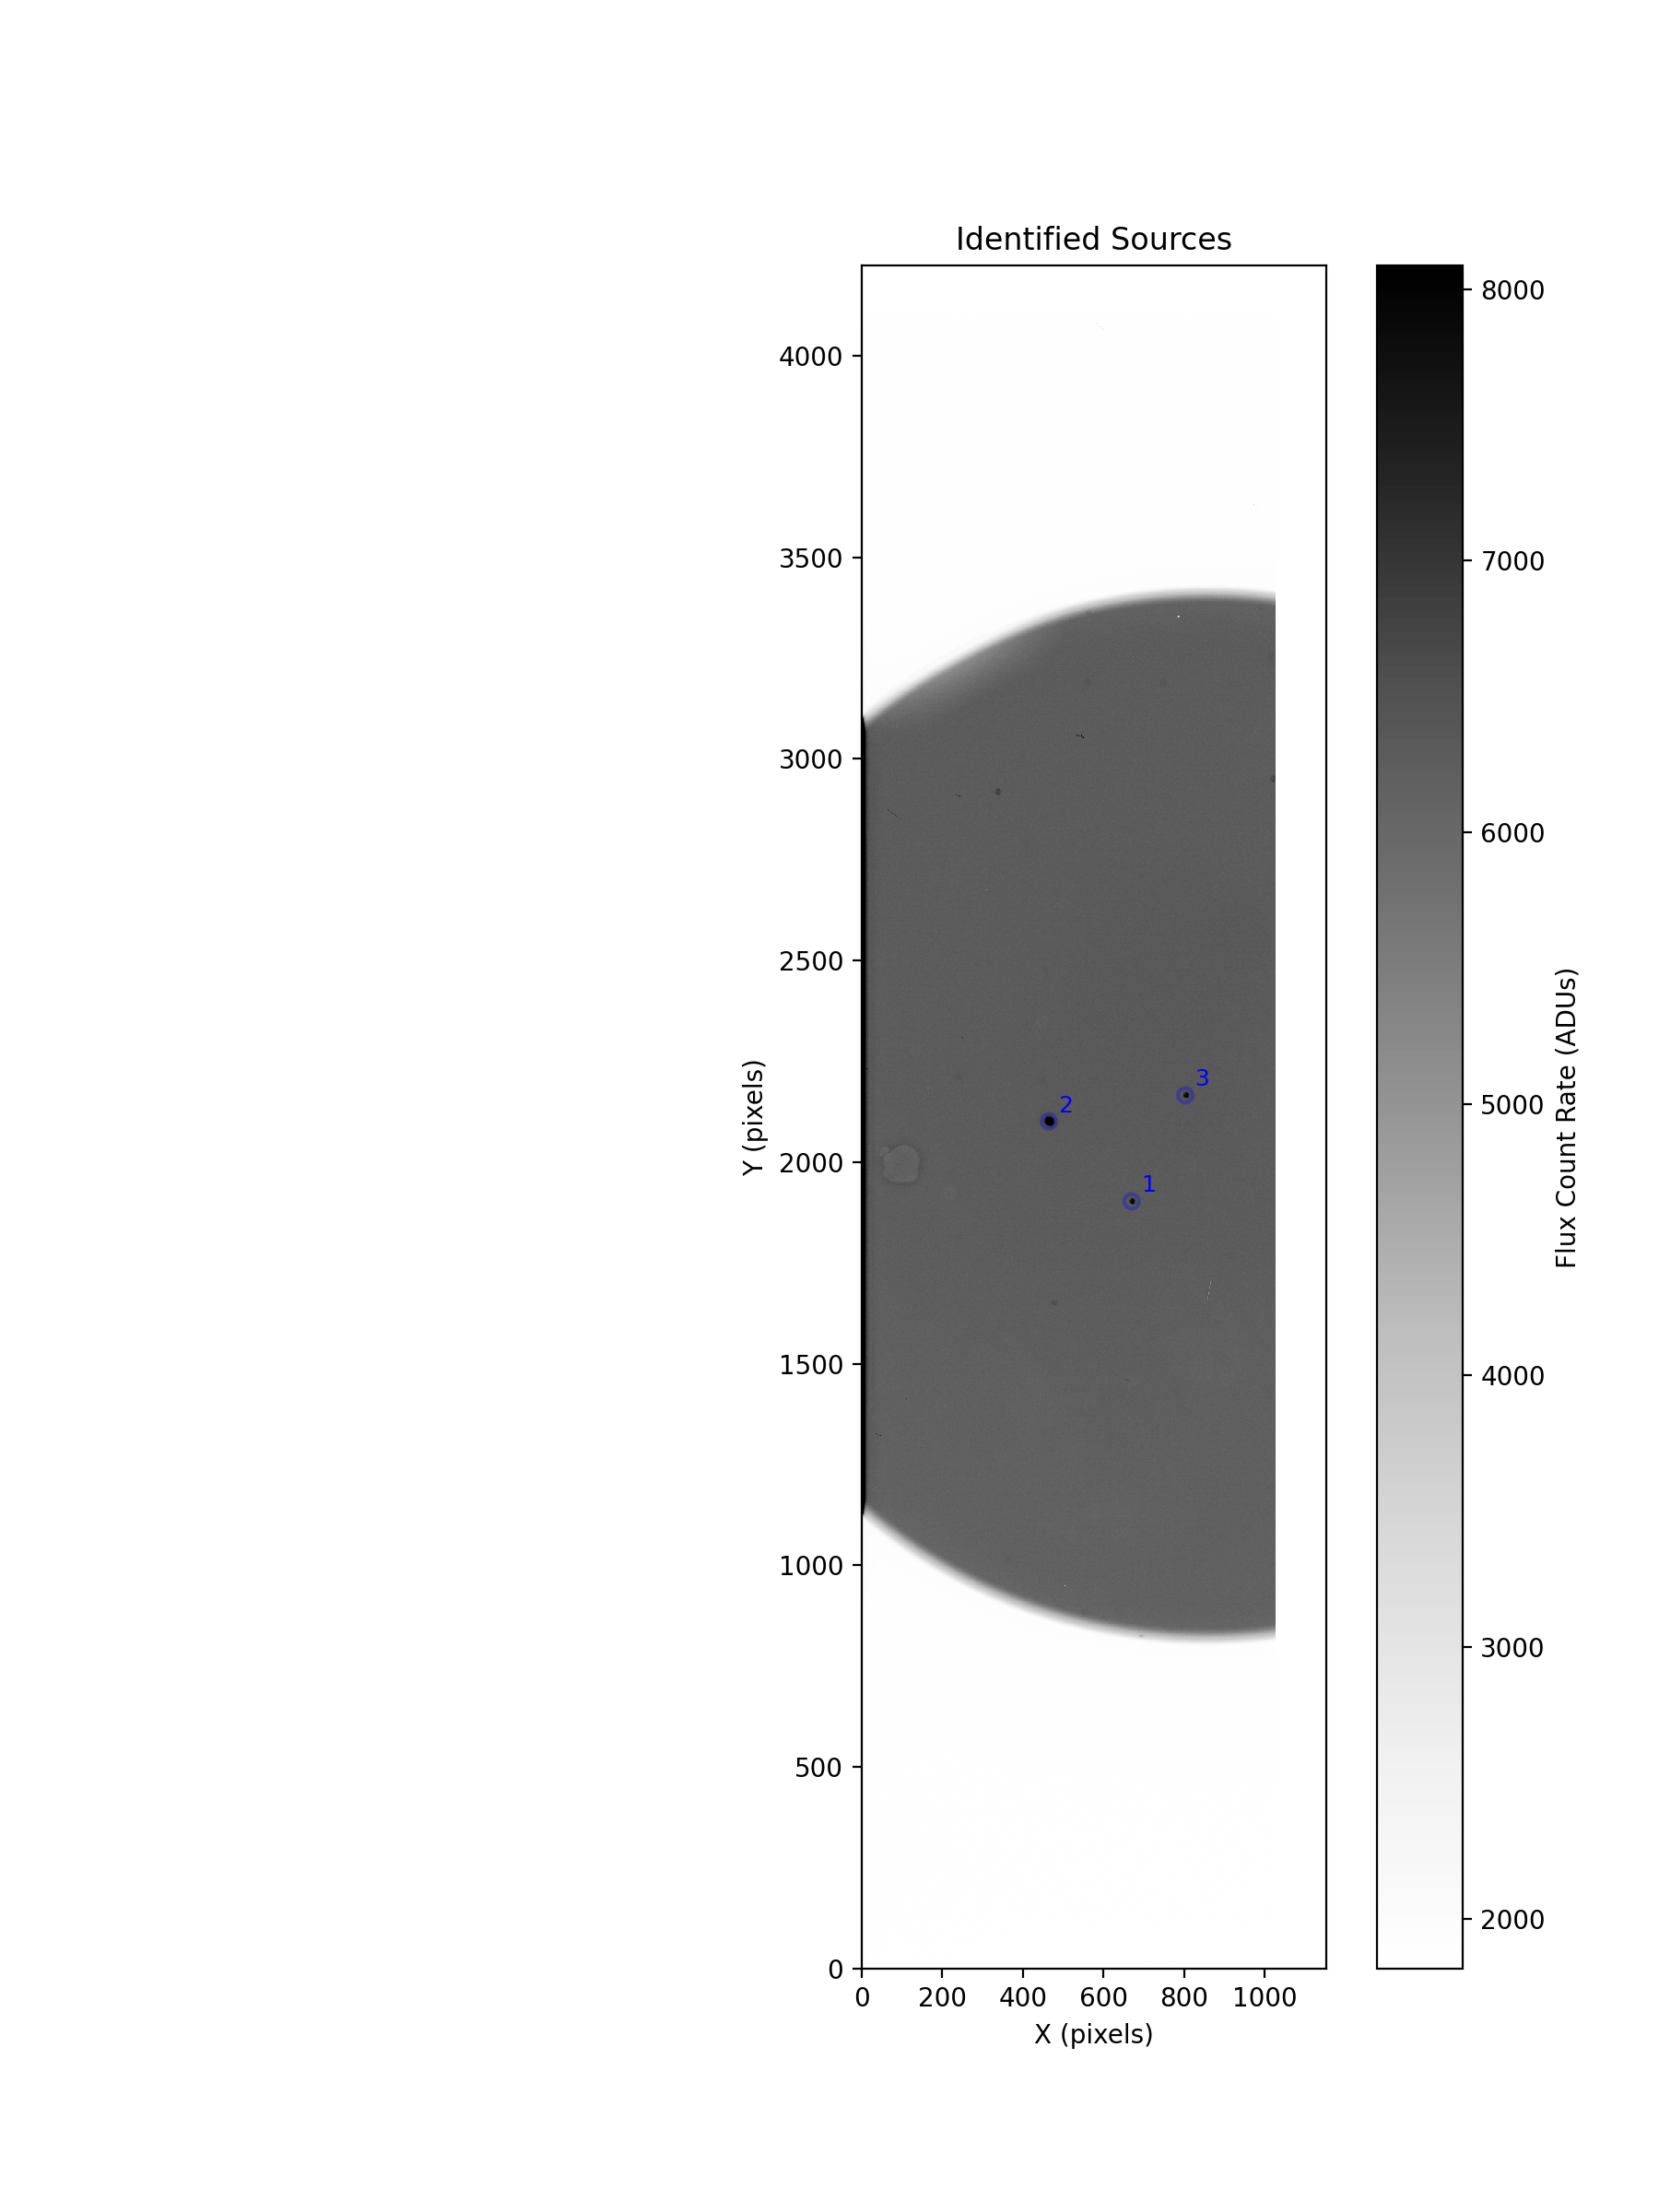

In [5]:
### 1. Gettting data array and header information from fits image. 

# Input parameter
filename = 'ccd1077c1.fits'

# Running get_image()
header, data = zpt.get_image(filename=filename) 

### 2. Finding Sources in the data array.

# Input parameters
fwhm = 22.0            # in pixels
threshold = 5.0
saturation = 65000.0   # in ADU's

# Running find_stars()
all_sources, good_stars, bad_stars = zpt.find_stars(data, fwhm=fwhm, threshold=threshold, 
                                                    saturation=saturation, show=True)

## 3. Getting Aperture Photometry and Estimating Zero Points

### 3.1 Getting Aperture Photometry

Here, we want to obtain the aperture photometry of the sources identified by the `zpt.find_stars` method in the cell above. Note that this step is redundant, because the `zpt.find_stars` function will be run again inside the `zpt.get_aperture_photo` method. So, we recommend you to run the `zpt.get_aperture_photo` using the same parameters you used in the `find_stars` method above.

You can skip the step above, but it is particularly useful if the field is crowded, because it is much easier to idenfity the stars of the field when displayed by the `zpt.find_stars` than by the `zpt.get_aperture_photo`. This happens because the `show` option of the `zpt.get_aperture_photo` functions display the apertures plus the annuli, which polutes the image displayed and can make the sources identification a bit hard to be done. 

We also recommend that you run the `zpt.get_aperture_photo` method in order to get used to it, even though this step is redundant with the `zpt.find_stars` method you just run above. 

Good news. No saturated sources!
 id  xcenter   ycenter  aperture_sum annulus_median  aper_bkg aper_sum_bkgsub
       pix       pix                                                         
--- --------- --------- ------------ -------------- --------- ---------------
  1 669.60185 1902.7485    8183342.7           6282   7894194       289148.64
  2 464.07684 2100.7942     12848049           6310 7929379.9       4918669.5
  3  802.7307 2165.5656    8239097.3           6326 7949486.1       289611.23


<IPython.core.display.Javascript object>


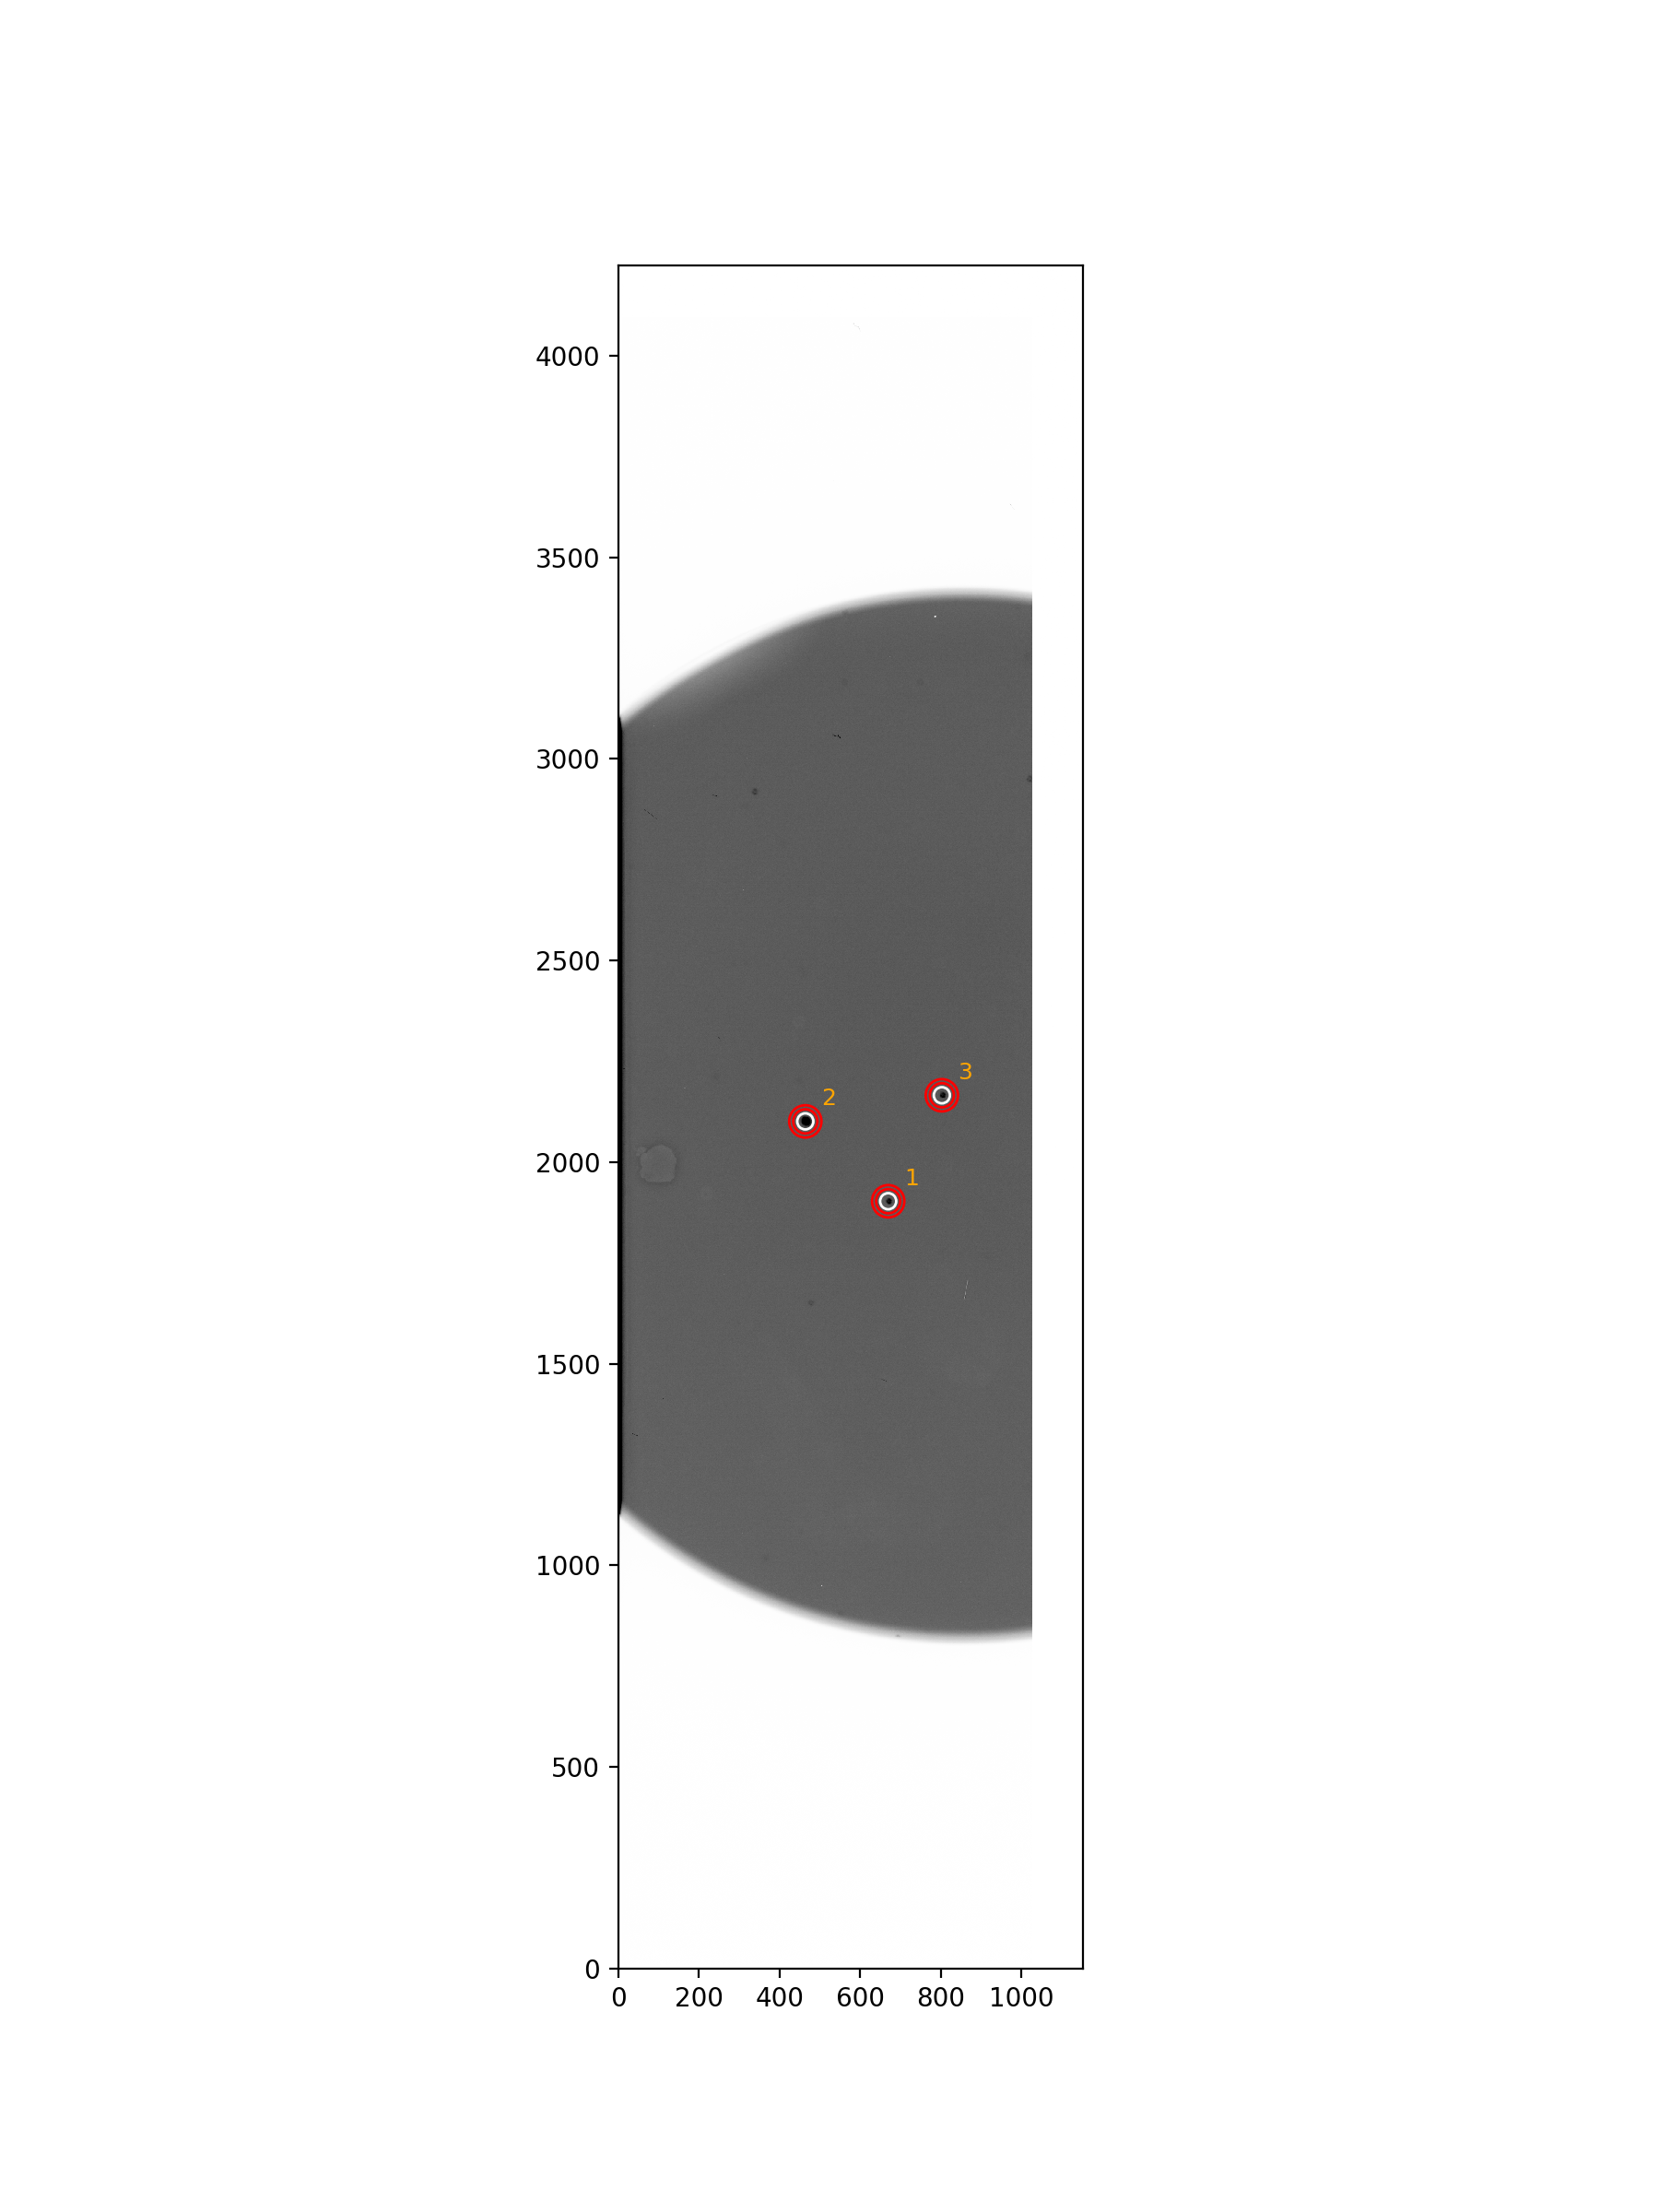

In [6]:
### Getting photometry. 

# Input paremeters related to the find_stars() method
fwhm = 22.0            # in pixels
threshold = 5.0
saturation = 65000.0   # in ADU's

# Input parameters related to the aperture photometry
aperture = 20.0        # in pixels
annulus_width = 10.0   # in pixels

# Running get_aperture_photo()
photo = zpt.get_aperture_photo(data, f_fwhm=fwhm, f_threshold=threshold, f_saturation=saturation, 
                               p_aperture=aperture, p_annulus_width=annulus_width, show=True)


### 3.2 Estimating Zero Points


In order to estimate the zero points, we have to run the `zpt.get_zpt` method giving as input the following parameters:

- `header`: stored in the variable `header` by running the `zpt.get_image` method;

- `photo`: a data frame with the output of the `zpt.get_aperture_photo` method;

- `sourc_id`: an integer number that identifies the observed star;

- `sdss_star`: the name of the star observed. The name of the star observed might match exactly the name of the star in the `sdss_faing.fits` table. It is passed as a string and it is not case sensitve.  

As we have already: 

1. Passed image/header informartion to the data/header variable (`zpt.get_image`);
2. Idenfied the sources in the data image (`zpt.find_stars`);
3. Obtained the aperture photometry (`zpt.get_aperture_photo`);

we can obtain the zero points by running the `zpt.get_zpt` in the cell below. As output, you will get the following information as a plain-text:

```
 >>> DATE-OBS   FILENAME   STAR-NAME   FILTER   STAR-MAGNITUDE   ZERO-POINT   EXPTIME   AIRMASS       
```

In [9]:
### Estimating the Zero Poits

# Input parameters
source_id = 2
starname = '92_282'

zpt.get_zpt(header, photo, egain=1.65, source_id=source_id,  fits_table='../sdss_faint.fits', sdss_star=starname)

'2019-12-06 ccd1077c1 92_282 z_Sloan 12.924 27.70 10.0'

#### Comparing results for the data sample.

If you are running this notebook in the `sample` data set, below we show the zero points we have obtained for a couple of files of the data set. This may be useful if you want to make sure you are obtaining the results as exepected. 

    2019-12-06 ccd1077c1 92_282 z_Sloan 12.924 27.70 10.0
    2019-12-06 ccd1078c1 92_282 z_Sloan 12.924 27.70 10.0
    2019-12-06 ccd1079c1 92_282 z_Sloan 12.924 27.72 10.0
    
    2019-12-06 ccd1080c1 92_282 i_Sloan 12.915 27.72 10.0
    2019-12-06 ccd1081c1 92_282 i_Sloan 12.915 27.73 10.0
    2019-12-06 ccd1082c1 92_282 i_Sloan 12.915 27.74 10.0
    
    2019-12-06 ccd1083c1 92_282 r_Sloan 12.936 27.74 10.0
    2019-12-06 ccd1084c1 92_282 r_Sloan 12.936 27.74 10.0
    2019-12-06 ccd1085c1 92_282 r_Sloan 12.936 27.75 10.0
    
    2019-12-06 ccd1086c1 92_282 g_Sloan 13.072 27.58 10.0
    2019-12-06 ccd1087c1 92_282 g_Sloan 13.072 27.59 10.0
    2019-12-06 ccd1088c1 92_282 g_Sloan 13.072 27.58 10.0


## Displaying Sources and Changing Image Contrast

It might be useful to use the method `zpt.display` in order to inspect better the field. Although the `find_stars` and `get_aperture_photo` methods have an option to display the image + identified sources, they don't allow us to change the image contrast. If you need to change the image contrast and the size of the circles around the idenfied soures, or even if you want to display also possible saturated stars, you can use the `zpt.display` function to do that. Assuming you have already identified the stars, just run the cell below.

Note that you can change the size of the circles display around the idenfied source by changing the `radio` parameter. You you can also get a differente `stretch` as input from one of the following options:  *‘linear’, ‘sqrt’, ‘power’, log’ or ‘asinh’*. By changing the `percent` value one can change the contrast of the displayed image, almost it does in the *ds9* application.

<IPython.core.display.Javascript object>


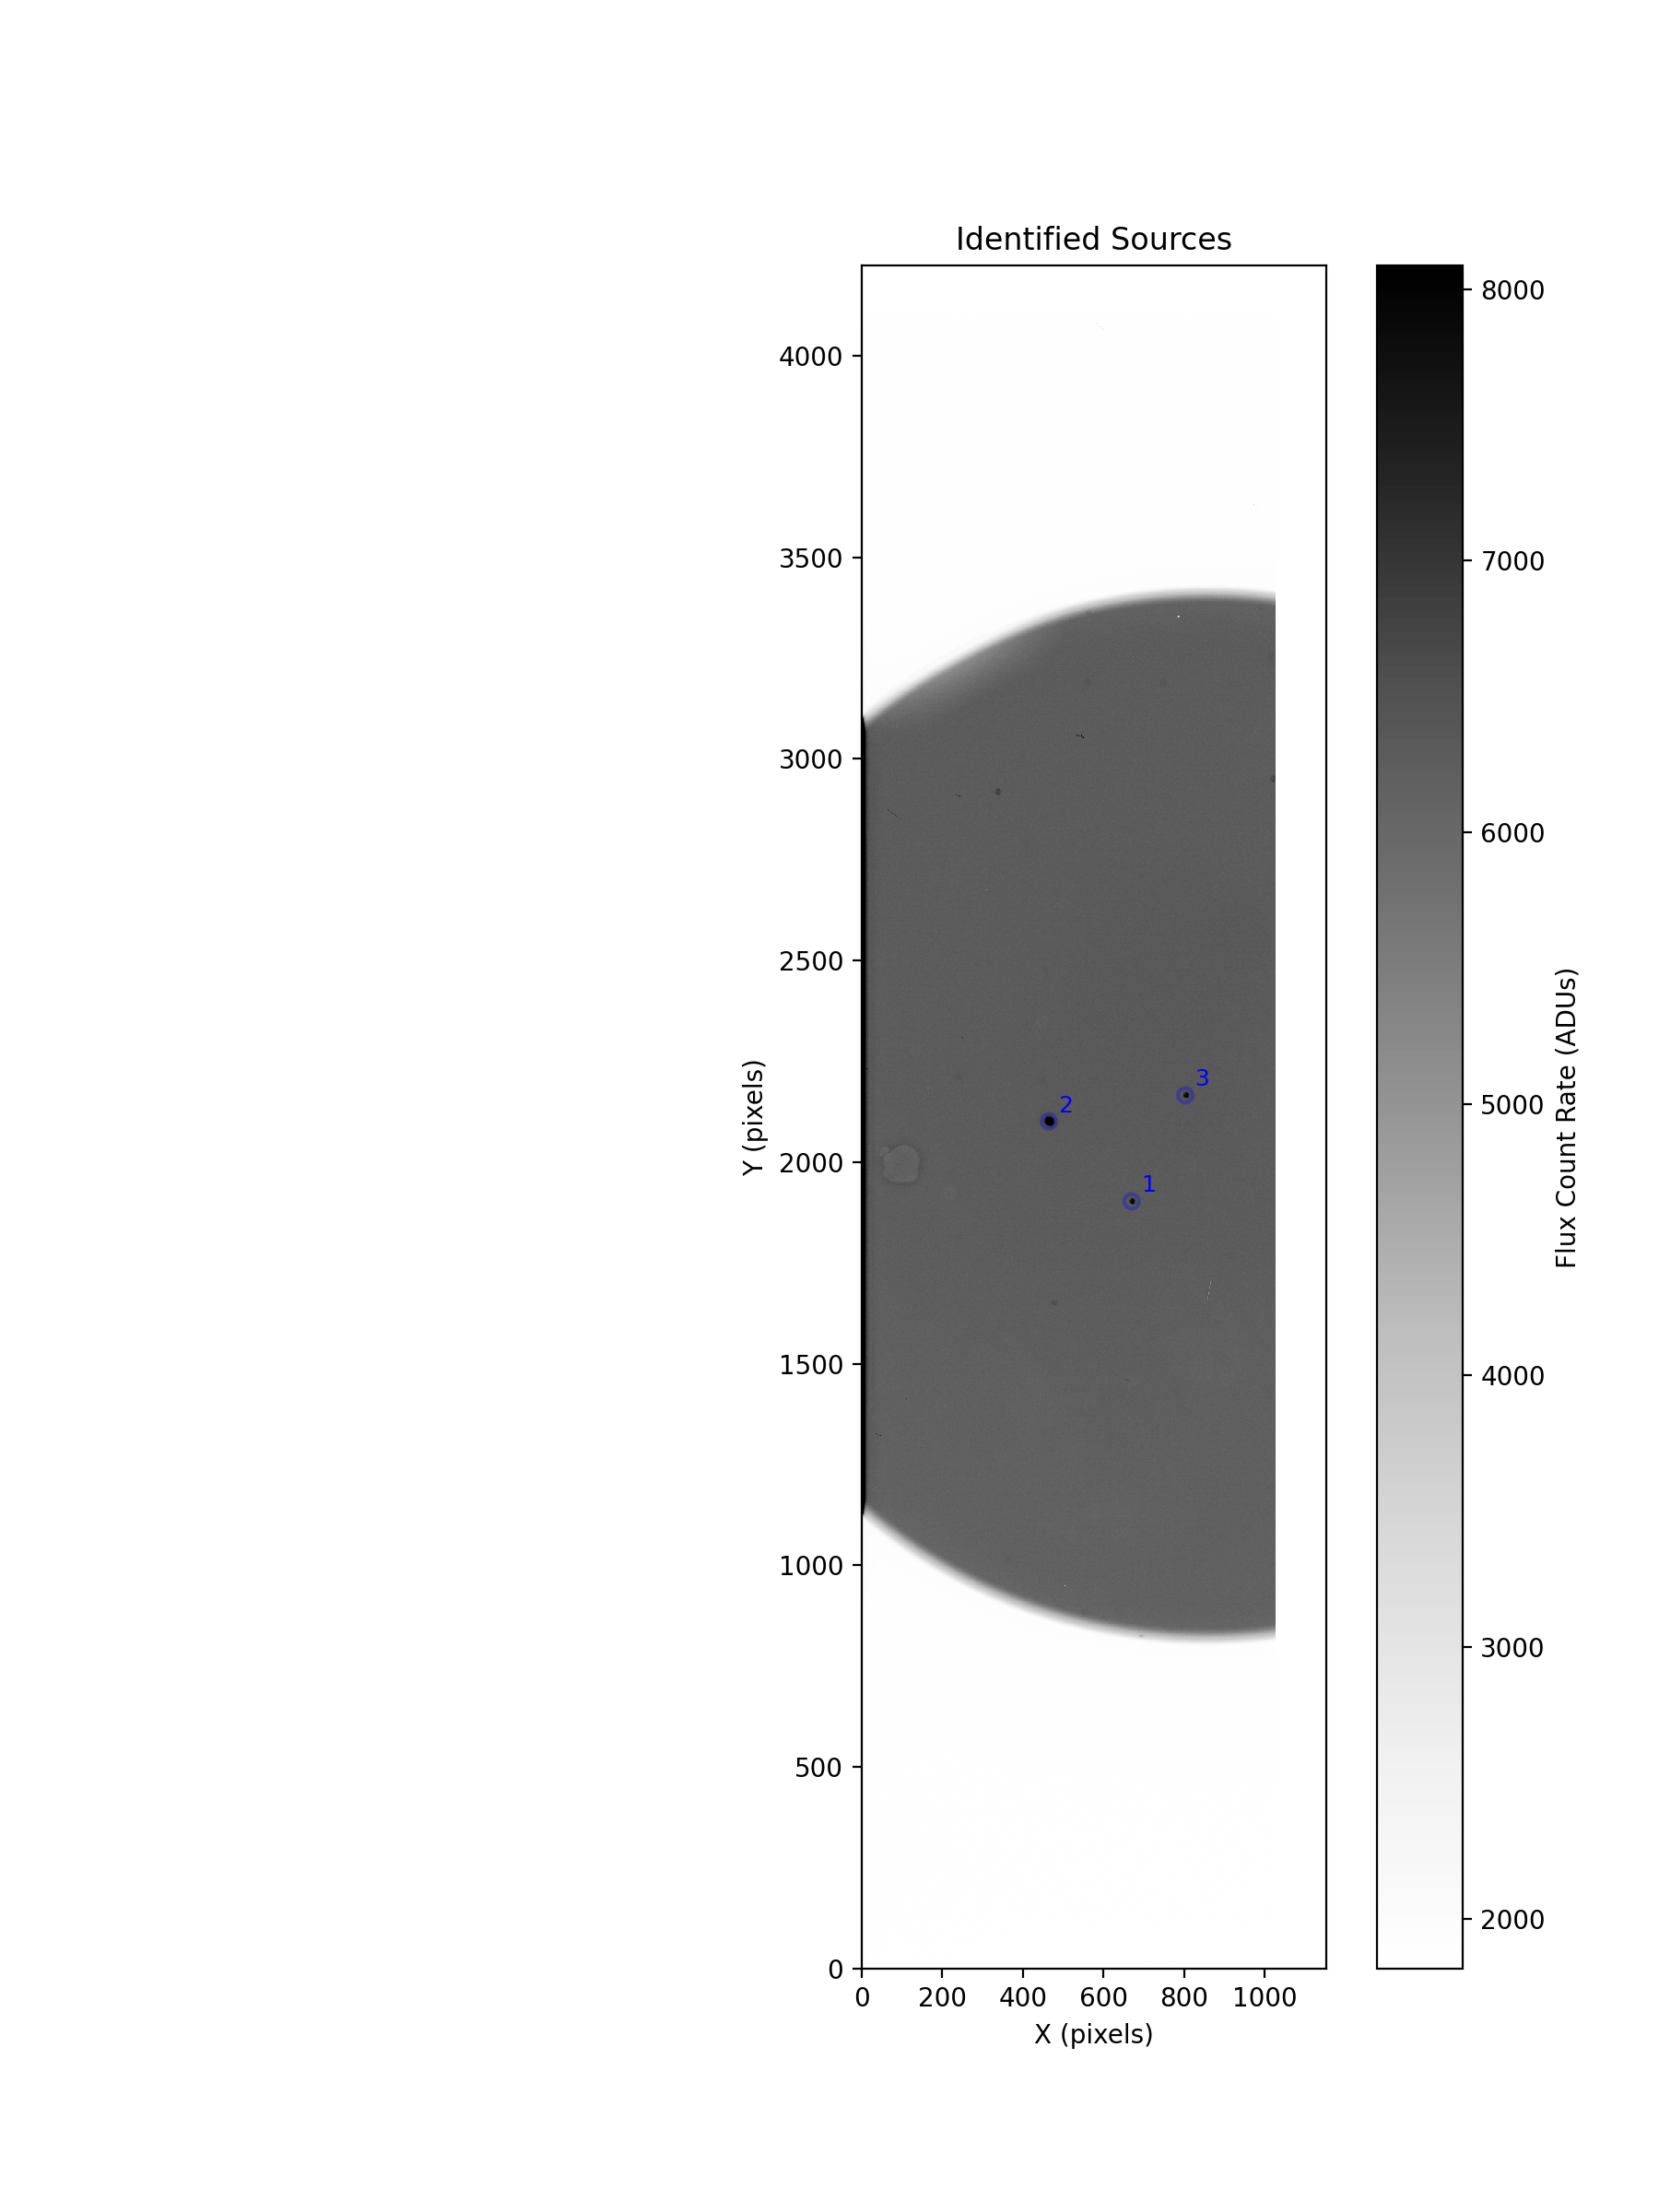

In [10]:
zpt.display(data, good_stars, saturated=bad_stars, radio=18.0, stretch='linear', percent=99.5)

## Displaying the `sdss_faint.fits` table

If you have downloaded the full 'package' from the GitLab repository, then the `sdss_faint.fits` table will be located inside the `data` folder. So, make sure you give the correct table as input to `zpt.get_table` methods (and `zpt.get_zpt`), which will read the fits table and return it as a data frame. In the cells below, we run the `get_table` method and displayt the table content.

[TABLE and FINDING CHARTS](http://james.as.arizona.edu/~psmith/61inch/ATLAS/tableA.html)

In [11]:
# Show the current dir
os.getcwd()

'/Users/dsanmartim/PycharmProjects/ldss/data/sample'

In [12]:
# Getting table path + filename
table_filename = os.path.join(os.pardir, 'sdss_faint.fits')

# Getting table data as a data frame
table = zpt.get_table(fits_table=table_filename)

# Displaying table
table

,Num,StarName,EPOCH,u_p,sig_u_p,g_p,sig_g_p,r_p,sig_r_p,i_p,sig_i_p,z_p,sig_z_p,RA_J2000,DEC_J2000
0,1,g158-100,2000.0,16.301001,0.018,15.201,0.006,14.691,0.006,14.469,0.004,14.377,0.009,8.475000,-12.133333
1,2,92_282,2000.0,14.072000,0.017,13.072,0.002,12.936,0.004,12.915,0.005,12.924,0.015,14.191667,0.641389
2,3,95_190,2000.0,14.019000,0.003,12.719,0.002,12.593,0.002,12.591,0.002,12.548,0.003,58.304167,0.272778
3,4,95_193,2000.0,17.424999,0.016,14.941,0.005,13.844,0.004,13.437,0.003,13.223,0.005,58.333333,0.276111
4,5,95_142,2000.0,14.468000,0.010,13.197,0.004,12.775,0.005,12.612,0.005,12.524,0.007,58.787500,0.021944
5,6,96_83,2000.0,12.976000,0.007,11.739,0.002,11.793,0.003,11.903,0.002,11.951,0.003,73.241667,-0.244722
6,7,97_249,2000.0,13.334000,0.005,12.018,0.002,11.567,0.001,11.426,0.001,11.388,0.002,89.279167,0.019444
7,8,98_685,2000.0,13.362000,0.010,12.144,0.002,11.857,0.003,11.787,0.002,11.788,0.004,103.075000,-0.338889
8,9,ru149center,2000.0,12.040000,0.003,11.388,0.001,11.601,0.001,11.804,0.001,11.940,0.001,111.075000,-0.538889
9,10,ru149f,2000.0,16.452000,0.013,13.986,0.002,13.119,0.002,12.802,0.001,12.636,0.002,111.054167,-0.527500


# 4. Running everything at once

As soon as you are familiar with the methods you run above, you can run everything at once (almost) following the
two steps given below:

## Step 1

- Get the data and header information;
- Get the aperture photometry;
- Display data and sources identified in the image.

Good news. No saturated sources!
Good news. No saturated sources!
 id  xcenter   ycenter  aperture_sum annulus_median  aper_bkg aper_sum_bkgsub
       pix       pix                                                         
--- --------- --------- ------------ -------------- --------- ---------------
  1 669.60185 1902.7485    8183342.7           6282   7894194       289148.64
  2 464.07684 2100.7942     12848049           6310 7929379.9       4918669.5
  3  802.7307 2165.5656    8239097.3           6326 7949486.1       289611.23


<IPython.core.display.Javascript object>


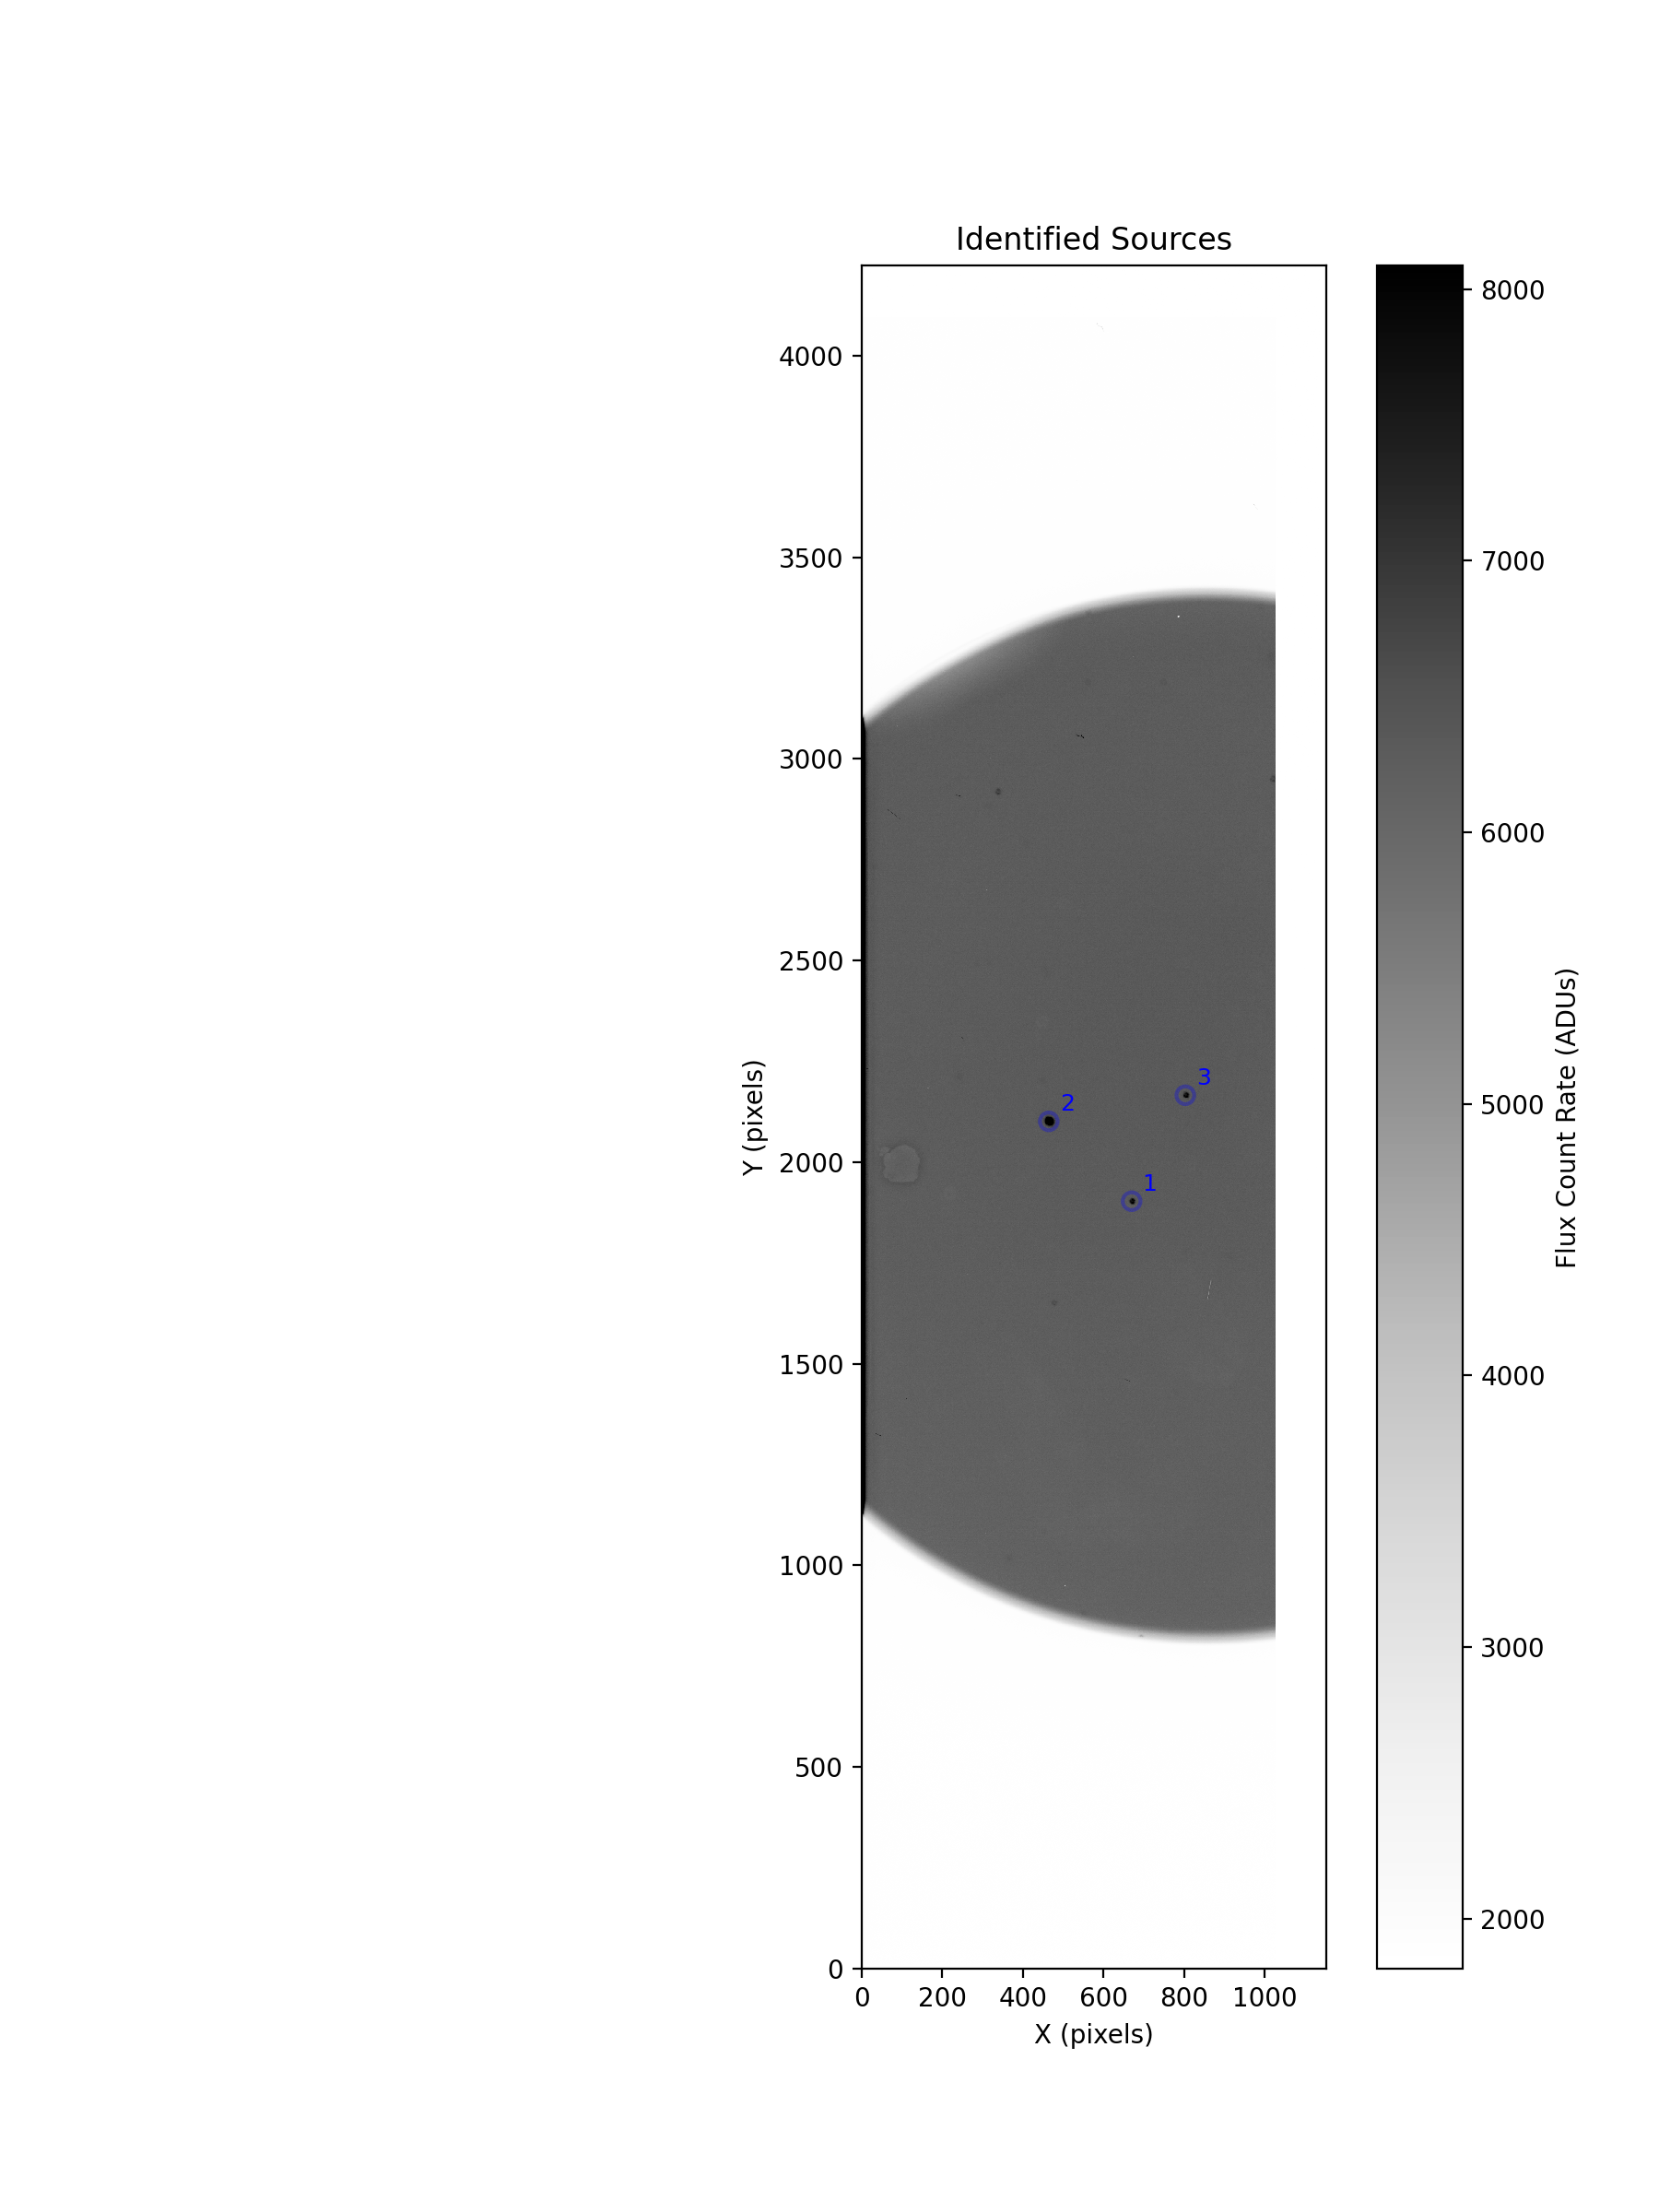

In [13]:
# Filename 
filename = 'ccd1077c1.fits'

# Finding sources parameters
fwhm = 22.0            # in pixels
threshold = 5.0
saturation = 65000.0   # in pixels

# Aperture photmetry paremeters
p_aperture=20.0        # in pixels
p_annulus_width=10.0   # in pixels

# Reading Image and Header
header, data = zpt.get_image(filename=filename) 

# Finding Soures and Storing Results in the data frames
all_stars, good_stars, bad_stars = zpt.find_stars(data, fwhm=fwhm, threshold=threshold, saturation=saturation, 
                                                  show=None)
# Getting Photometry
photo = zpt.get_aperture_photo(data, f_fwhm=fwhm, f_threshold=threshold, f_saturation=saturation, 
                               p_aperture=p_aperture, p_annulus_width=p_annulus_width, show=None)

# Displaying Identified Sources
zpt.display(data, sources=all_stars, saturated=bad_stars, radio=fwhm, stretch='linear', percent=99.5)

### Step 2

- Identify your source inspecting the image displayed above;
- Provide the input paremeters to the `zpt.get_zpt` method;
- Get the zero point, finally!

In [14]:
# Identify the observed star
source_id = 2

# Name of the observed field. The star name should match the name given in the table above (not case sensitive).
observed_star = '92_282'

# Gettint zero point
zpt.get_zpt(header, photo, egain=1.65, fits_table=table_filename, source_id=source_id, sdss_star=observed_star)

'2019-12-06 ccd1077c1 92_282 z_Sloan 12.924 27.70 10.0'